In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve,roc_auc_score,classification_report
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [7]:
import pandas as pd

# Use the raw GitHub URL to access the CSV file
url = "https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Medical%20Cost%20Insurance/medical_cost_insurance.csv"

# Read the CSV file
data = pd.read_csv(url)

# Display the first few rows of the DataFrame using head()
data.head(20)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [9]:
data.shape

(1338, 7)

In [10]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [11]:
from sklearn.preprocessing import OrdinalEncoder

In [20]:
ord_encoder=OrdinalEncoder(categories=[['male','female']])
df1=ord_encoder.fit_transform(data[['sex']])
df1

array([[1.],
       [0.],
       [0.],
       ...,
       [1.],
       [1.],
       [1.]])

In [21]:
ord_encoder=OrdinalEncoder(categories=[['yes','no']])
df2=ord_encoder.fit_transform(data[['smoker']])
df2

array([[0.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [0.]])

In [22]:
unique_regions = data['region'].unique()

# Display unique regions
print(unique_regions)

['southwest' 'southeast' 'northwest' 'northeast']


In [23]:
ord_encoder=OrdinalEncoder(categories=[['southwest','southeast','northwest','northeast']])
df3=ord_encoder.fit_transform(data[['region']])
df3

array([[0.],
       [1.],
       [1.],
       ...,
       [1.],
       [0.],
       [2.]])

In [29]:
data['sex']=df1
data['smoker']=df2
data['region']=df3


In [35]:
data.sample(20)

,age,sex,bmi,children,smoker,region,charges
768,64,1.0,39.700,0,1.0,0.0,14319.03100
386,58,1.0,39.050,0,1.0,1.0,11856.41150
159,50,1.0,27.830,3,1.0,1.0,19749.38338
195,19,0.0,30.590,0,1.0,2.0,1639.56310
1102,29,0.0,38.940,1,1.0,1.0,3471.40960
1310,42,0.0,26.315,1,1.0,2.0,6940.90985
947,37,0.0,34.200,1,0.0,3.0,39047.28500
484,48,0.0,34.300,3,1.0,0.0,9563.02900
301,53,1.0,22.610,3,0.0,3.0,24873.38490
944,62,0.0,39.930,0,1.0,1.0,12982.87470


# Plotting Headmap(correlation marix)

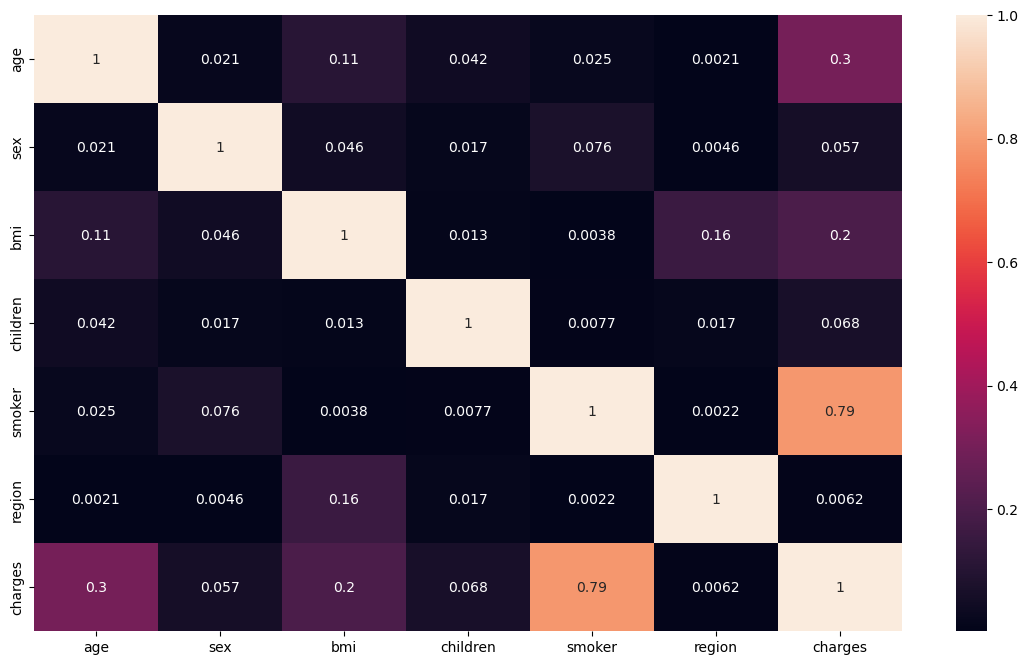

In [36]:
df_corr=data.corr().abs()#This code will get the corellation of one variable with all the other variable

plt.figure(figsize=(14,8))
sns.heatmap(df_corr,annot=True,annot_kws={'size':10})
plt.show()

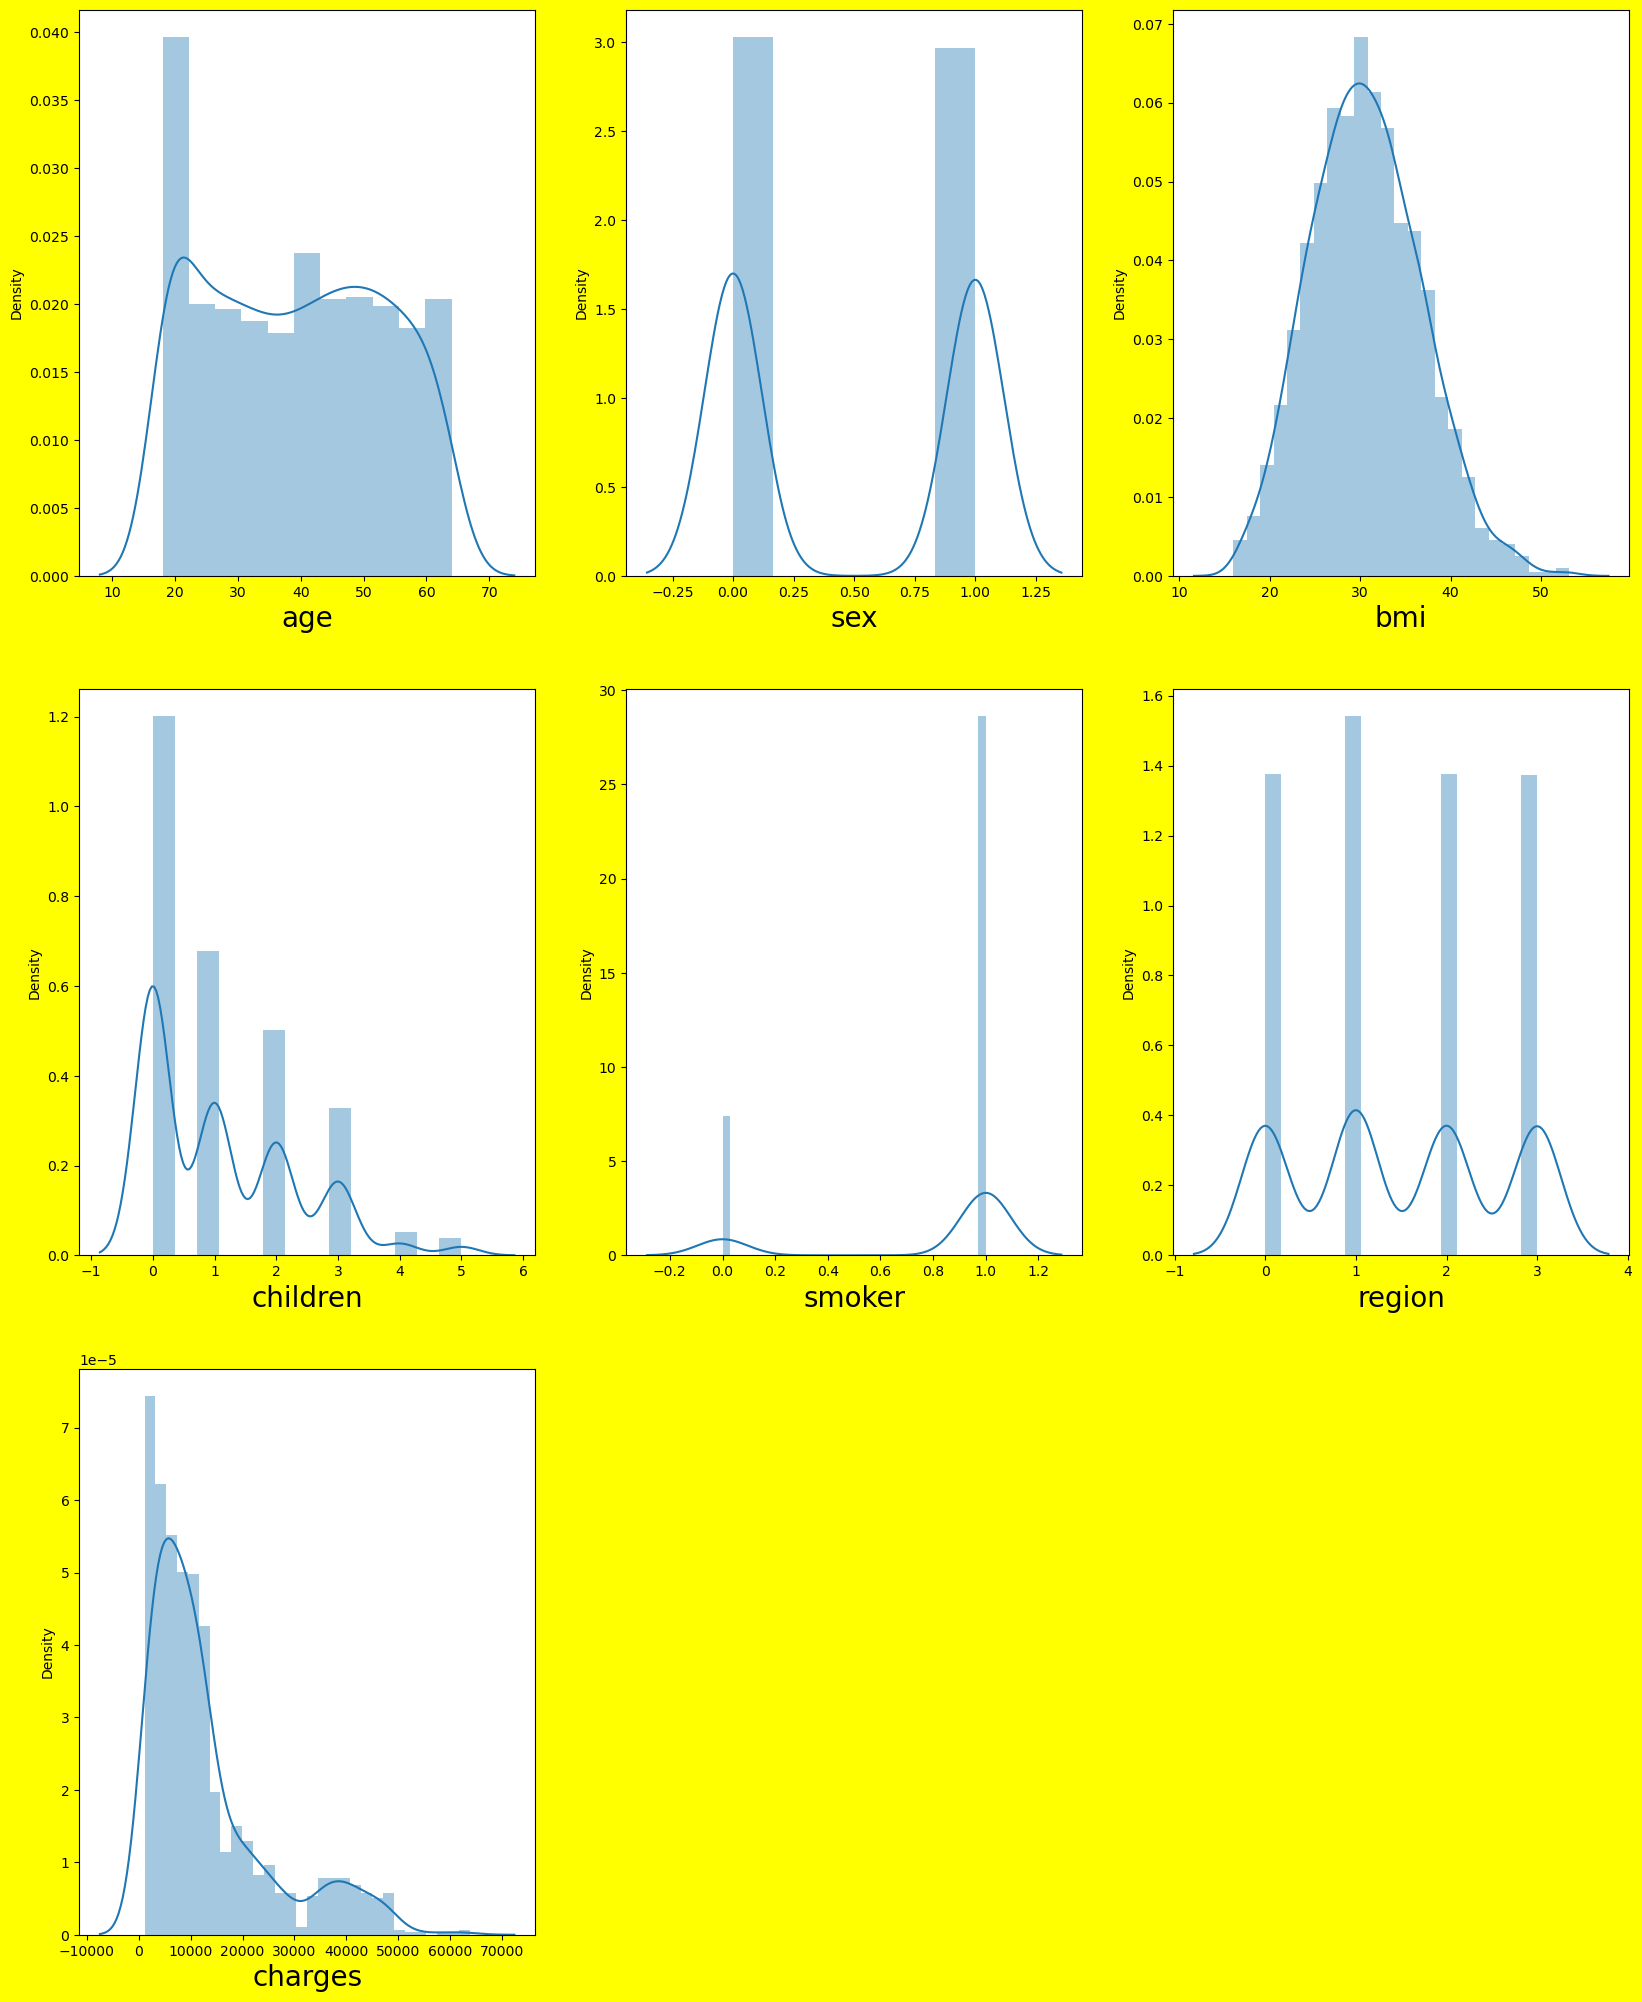

In [37]:
plt.figure(figsize=(20,25),facecolor='yellow')
plotnumber=1
for column in data:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    
    plotnumber+=1
plt.show()

In [38]:
x=data.drop(columns=['charges'],axis=1)
y=data['charges']

In [52]:
#train test split (hold out method)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=100)

In [53]:
from sklearn.ensemble import AdaBoostRegressor

In [54]:
ada=AdaBoostRegressor()

In [55]:
ada.fit(x_train,y_train)

AdaBoostRegressor()

In [56]:
#Model prediction on train data
y_pred=ada.predict(x_train)

In [57]:
x_train

,age,sex,bmi,children,smoker,region
999,36,1.0,26.885,0,1.0,2.0
884,25,0.0,26.695,4,1.0,2.0
517,45,0.0,30.495,2,1.0,2.0
1132,57,0.0,40.280,0,1.0,3.0
1188,43,1.0,25.270,1,0.0,3.0
...,...,...,...,...,...,...
802,21,0.0,22.300,1,1.0,0.0
53,36,0.0,34.430,0,0.0,1.0
350,57,1.0,23.180,0,1.0,2.0
79,41,1.0,32.965,0,1.0,2.0


In [58]:
y_pred[:6]

array([ 7000.35617227,  7000.35617227, 11831.4967382 , 15051.92153067,
       25189.89963696,  7000.35617227])

In [59]:
from sklearn import metrics
accuracy=metrics.r2_score(y_train,y_pred)
print("R square score",accuracy)

R square score 0.8286749231736323


In [60]:
# Predicting test data with model
y_test_pred=ada.predict(x_test)

In [61]:
accuracy=metrics.r2_score(y_test,y_test_pred)
print("R square score",accuracy)

R square score 0.8539601810200239


# Hyperparameter Tuning using RandomizedSearchCV

In [62]:
from sklearn.model_selection import RandomizedSearchCV

In [63]:
params={'n_estimators':[47,50,60,70],'learning_rate':[0.09,0.25,0.30]}

In [64]:
rnd_srch=RandomizedSearchCV(AdaBoostRegressor(),cv=5,param_distributions=params)

In [65]:
rnd_srch.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=AdaBoostRegressor(),
                   param_distributions={'learning_rate': [0.09, 0.25, 0.3],
                                        'n_estimators': [47, 50, 60, 70]})

In [66]:
rnd_srch.best_estimator_

AdaBoostRegressor(learning_rate=0.09)

In [67]:
ada=AdaBoostRegressor(learning_rate=0.35,n_estimators=47)
ada.fit(x_train,y_train)
y_pred=ada.predict(x_test)
print('**** accuracy post tuning ****')
print(metrics.r2_score(y_test,y_pred))

**** accuracy post tuning ****
0.8437986663578012


In [69]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

In [71]:
model.fit(x_train, y_train)

RandomForestRegressor()

In [78]:
predictions = model.predict(x_test)

In [79]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 2807.497139291268


In [80]:
accuracy=metrics.r2_score(y_test,predictions)
print("R square score",accuracy)

R square score 0.8496340544242139


# Hyperparameter Tuning using RandomizedSearchCV


In [81]:
from sklearn.model_selection import RandomizedSearchCV

In [87]:
params = {
    'n_estimators': [47, 50, 60, 70],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [88]:
rnd_srch=RandomizedSearchCV(RandomForestRegressor(),cv=5,param_distributions=params)

In [89]:
rnd_srch.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [None, 10, 20, 30],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [47, 50, 60, 70]})

In [90]:
rnd_srch.best_estimator_

RandomForestRegressor(max_depth=10, min_samples_leaf=4, min_samples_split=5,
                      n_estimators=50)

In [91]:
RFR=RandomForestRegressor(max_depth=10,n_estimators=50,min_samples_leaf=4,min_samples_split=5)
RFR.fit(x_train,y_train)
y_pred=RFR.predict(x_test)
print('**** accuracy post tuning ****')
print(metrics.r2_score(y_test,y_pred))

**** accuracy post tuning ****
0.8829941198985795
